In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

def process_and_plot_temperature(pkl_path, sensor_type=0, start_time_ms=None, end_time_ms=None):
    # sensor_type: 0 for 24x32, 1 for 12x16
    if sensor_type == 0:
        fps_list = [6.43, 6.47, 6.50, 6.53, 6.56]
        center_size = (10, 10)
    elif sensor_type == 1:
        fps_list = [15.43, 15.47, 15.50, 15.53, 15.56]
        center_size = (5, 5)
    else:
        raise ValueError("sensor_type must be 0 (24x32) or 1 (12x16)")

    # 读取数据
    with open(pkl_path, 'rb') as f:
        temperature_frames = pickle.load(f)

    avg_fps = sum(fps_list) / len(fps_list)
    time_interval_ms = 1000 / avg_fps
    total_frames = len(temperature_frames)

    # 获取帧尺寸
    h, w = temperature_frames[0].shape
    ch, cw = center_size
    start_row = h // 2 - ch // 2
    end_row = start_row + ch
    start_col = w // 2 - cw // 2
    end_col = start_col + cw

    # 提取中心区域平均温度
    avg_temp_per_frame = []
    for frame in temperature_frames:
        center_region = frame[start_row:end_row, start_col:end_col]
        avg_temp = np.mean(center_region[center_region > 0])
        avg_temp_per_frame.append(avg_temp)

    # 构造时间轴
    time_axis = np.arange(0, total_frames * time_interval_ms, time_interval_ms)

    if start_time_ms is None:
    # ✅ Step 1: the full data
        plt.figure(figsize=(10, 4))
        plt.plot(time_axis, avg_temp_per_frame, marker='o', color='blue')
        plt.title(f"Full Data: Avg Temp (Sensor {sensor_type}, fps={avg_fps:.2f})")
        plt.xlabel("Time (ms)")
        plt.ylabel("Average Temperature (°C)")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # ✅ Step 2: if you want to clip the data, then set the start_time_ms and end_time_ms
    if start_time_ms is not None:
        start_frame = int(start_time_ms / time_interval_ms)
        end_frame = int(end_time_ms / time_interval_ms) if end_time_ms else total_frames

        clip_temp = avg_temp_per_frame[start_frame:end_frame]
        clip_time = time_axis[start_frame:end_frame]

        plt.figure(figsize=(10, 4))
        plt.plot(clip_time, clip_temp, marker='o', linestyle='-', color='blue')
        plt.title(f"Clipped: Avg Temp ({start_time_ms}ms - {clip_time[-1]:.0f}ms)")
        plt.xlabel("Time (ms)")
        plt.ylabel("Average Temperature (°C)")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        


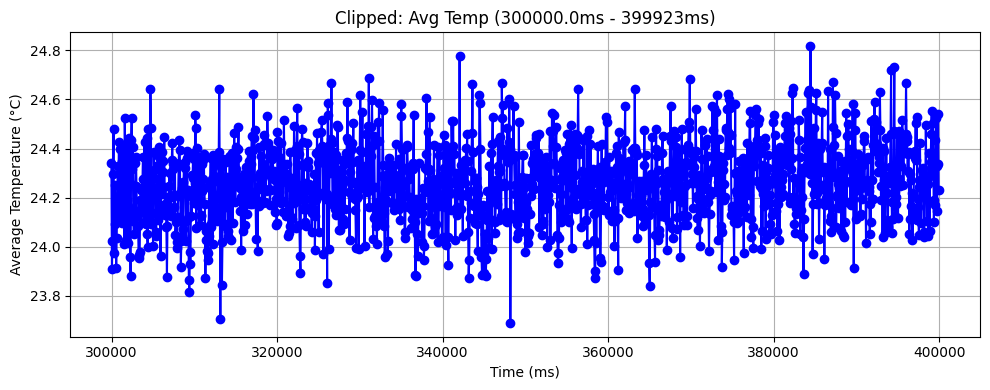

In [16]:
process_and_plot_temperature(
    pkl_path="/home/yvonne/Documents/ThermalEye/ira_data/0411/blank_20250411_133635.pkl",
    sensor_type=1,
    start_time_ms=3e5,
    end_time_ms=4e5
)

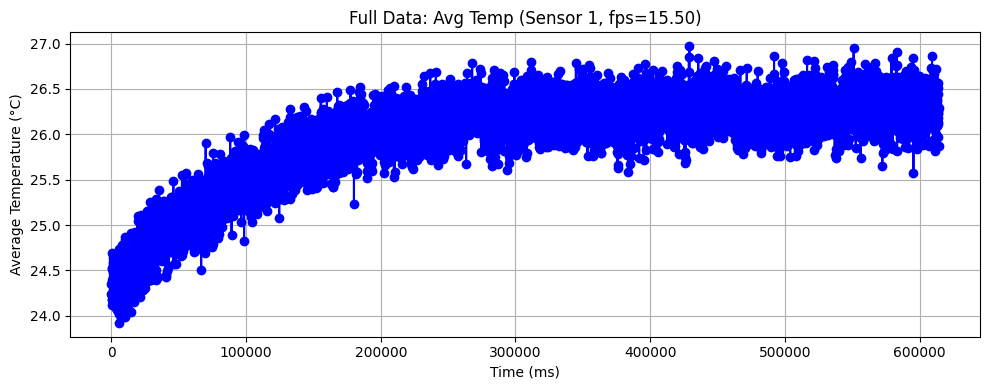

In [3]:
process_and_plot_temperature(
    pkl_path="/home/yvonne/Documents/ThermalEye/ira_data/0411/blank_20250411_141711.pkl",
    sensor_type=1,
)

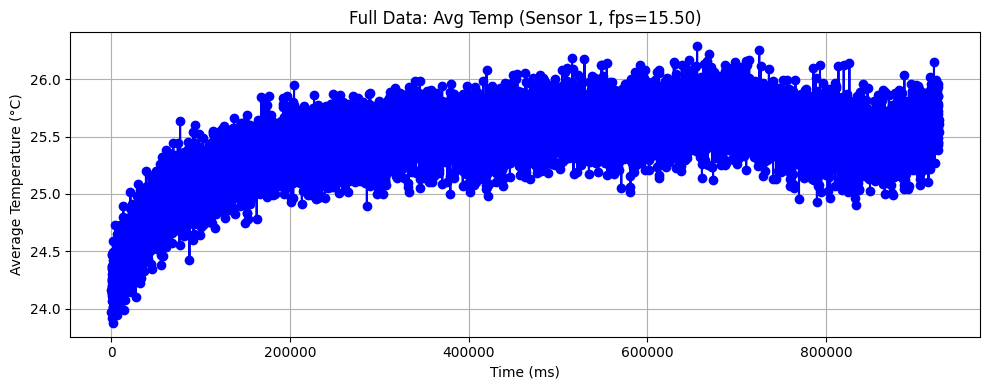

In [4]:
process_and_plot_temperature(
    pkl_path="/home/yvonne/Documents/ThermalEye/ira_data/0411/blank_20250411_143731.pkl",
    sensor_type=1,
)

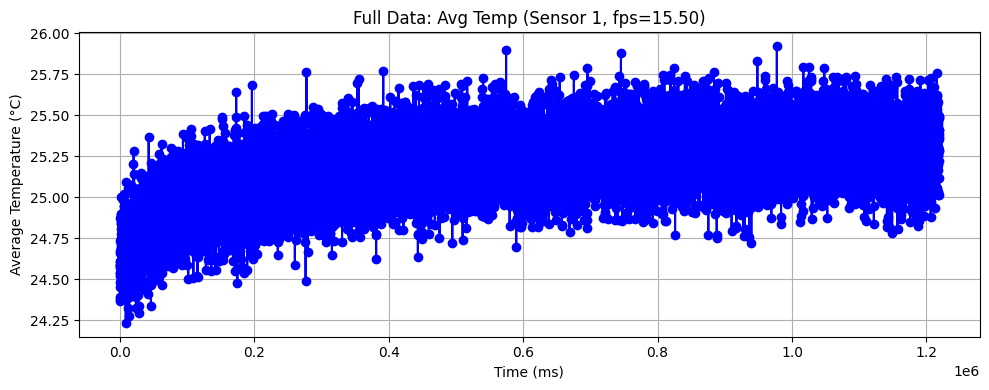

In [5]:
process_and_plot_temperature(
    pkl_path="../ira_data/0411/blank_20250411_150357.pkl",
    sensor_type=1,
)